# Feature Engineering

## Objective

The primary objective of this notebook is to perform feature engineering on the data outputted from the [data ingestion notebook](./1_data_ingestion.ipynb). More generally, we want to put the data in a format that is ready for model training.

## Imports/Configuration

In [73]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# only display up to 3 decimal points when pd is used in print()
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

in_file_paths = {
    'train': './outputs/1_train.csv',
    'test': './outputs/1_test.csv'
}

out_file_paths = {
    'root': './outputs',
    'train': './outputs/2_train.csv',
    'test': './outputs/2_test.csv',
}

# assert that input data exists
try:
    assert(os.path.exists(in_file_paths['train']))
    assert(os.path.exists(in_file_paths['test']))
except:
    raise Exception("Input data does not exist: run 1_data_ingestion.ipynb first")

In [199]:
df = pd.read_csv(in_file_paths['train'], index_col='Id')
print(f"successfully read dataset...\ntrain shape = {df.shape}")
df.head()

successfully read dataset...
train shape = (1460, 74)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000,8450,Pave,NONE,Reg,Lvl,Inside,Gtl,...,61,0,0,0,NONE,NONE,0,WD,Normal,208500
2,20,RL,80.000,9600,Pave,NONE,Reg,Lvl,FR2,Gtl,...,0,0,0,0,NONE,NONE,0,WD,Normal,181500
3,60,RL,68.000,11250,Pave,NONE,IR1,Lvl,Inside,Gtl,...,42,0,0,0,NONE,NONE,0,WD,Normal,223500
4,70,RL,60.000,9550,Pave,NONE,IR1,Lvl,Corner,Gtl,...,35,272,0,0,NONE,NONE,0,WD,Abnorml,140000
5,60,RL,84.000,14260,Pave,NONE,IR1,Lvl,FR2,Gtl,...,84,0,0,0,NONE,NONE,0,WD,Normal,250000


In [19]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
count,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,57.623,10516.828,6.099,5.575,1971.268,1984.866,103.117,443.640,567.240,...,1868.740,1.767,472.980,94.245,46.660,21.954,3.410,15.061,43.489,180921.196
std,42.301,34.664,9981.265,1.383,1.113,30.203,20.645,180.731,456.098,441.867,...,453.697,0.747,213.805,125.339,66.256,61.119,29.317,55.757,496.123,79442.503
min,20.000,0.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,34900.000
25%,20.000,42.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,223.000,...,1958.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,129975.000
50%,50.000,63.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,477.500,...,1977.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,163000.000
75%,70.000,79.000,11601.500,7.000,6.000,2000.000,2004.000,164.250,712.250,808.000,...,2001.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,214000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,2336.000,...,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,15500.000,755000.000


## Data visualization

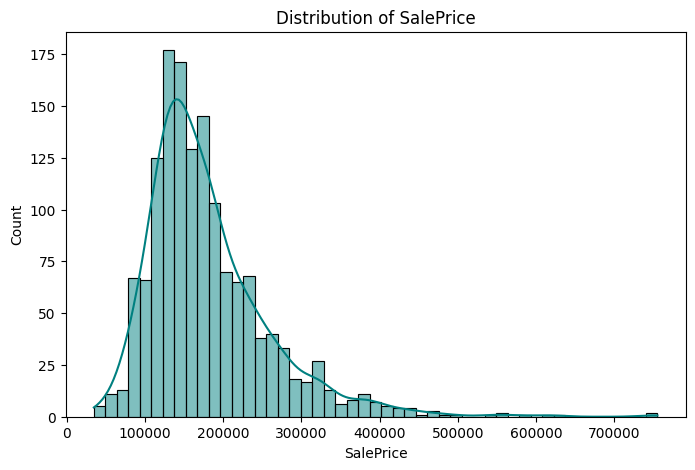

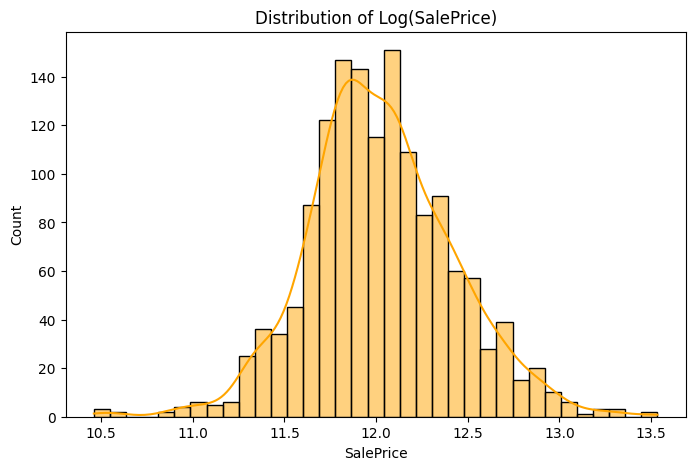

In [51]:
# How is the target variable (SalePrice) distributed?
import numpy as np

plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True, color="teal")
plt.title("Distribution of SalePrice")
plt.show()

# Check log transformation
logSalePrice = np.log(df["SalePrice"])
plt.figure(figsize=(8,5))
sns.histplot(logSalePrice, kde=True, color="orange")
plt.title("Distribution of Log(SalePrice)")
plt.show()


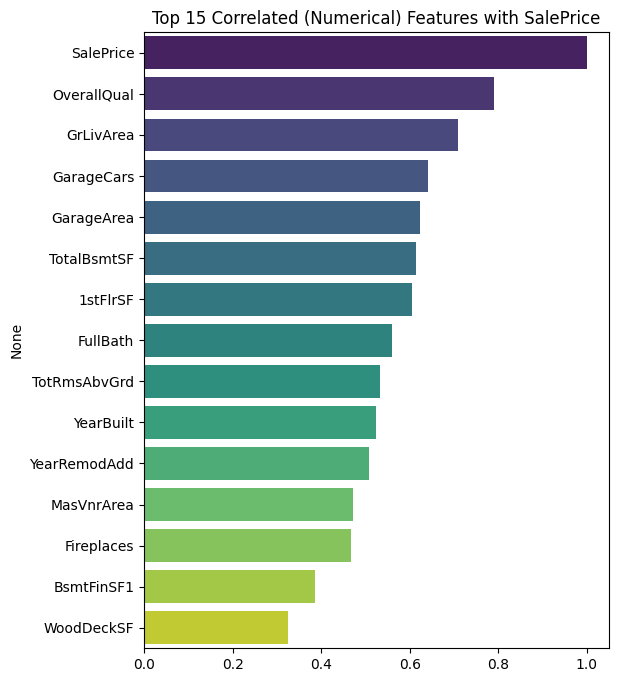

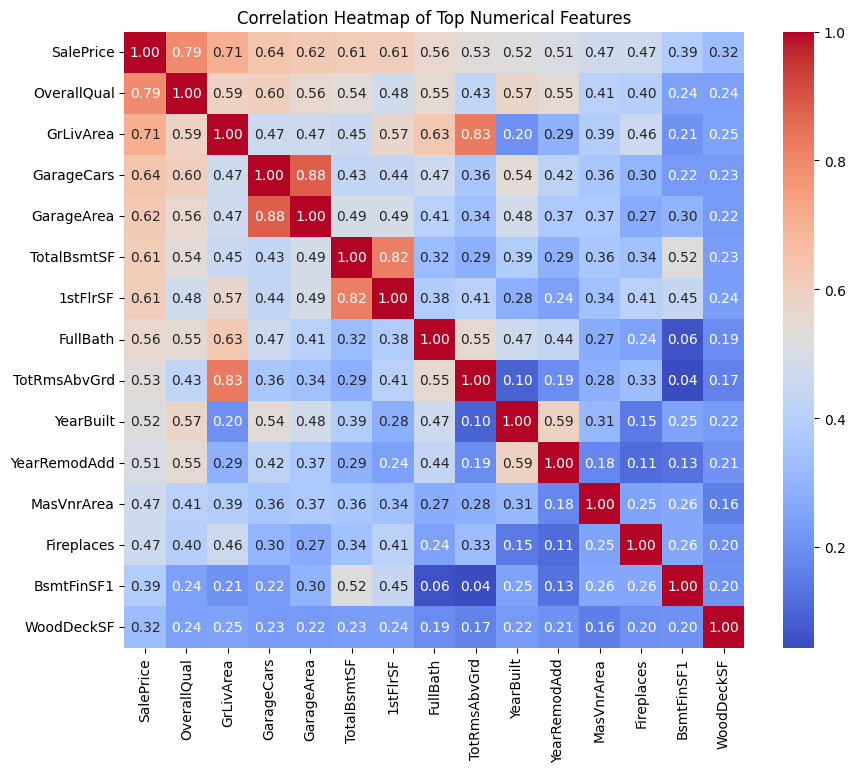

In [5]:
# Correlation heatmap (numeric features)
# Compute and visualize correlations with SalePrice

corr = df.select_dtypes('number').corr()
top_corr = corr["SalePrice"].sort_values(ascending=False).head(15)

plt.figure(figsize=(6,8))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title("Top 15 Correlated (Numerical) Features with SalePrice")
plt.show()

# Heatmap of these top features
plt.figure(figsize=(10,8))
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Top Numerical Features")
plt.show()

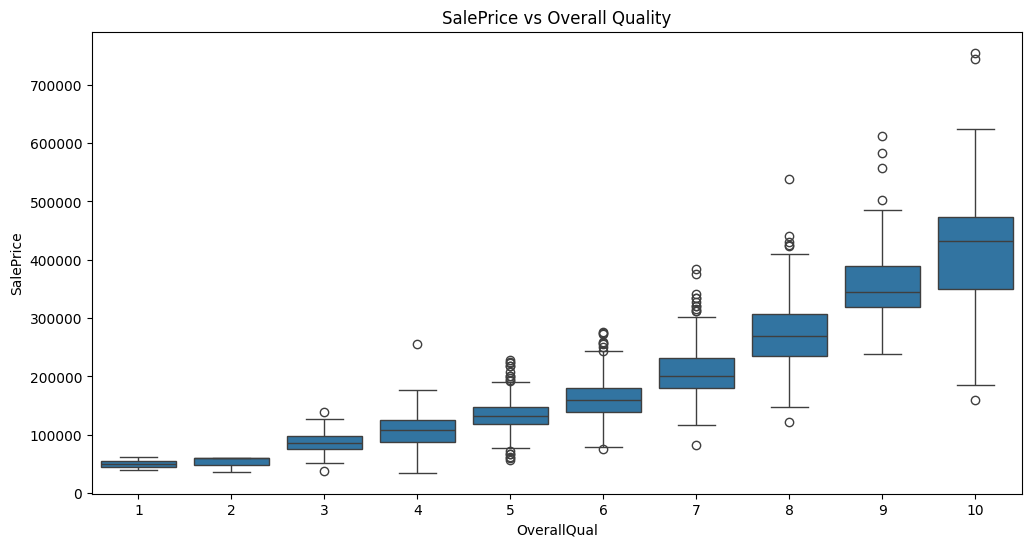

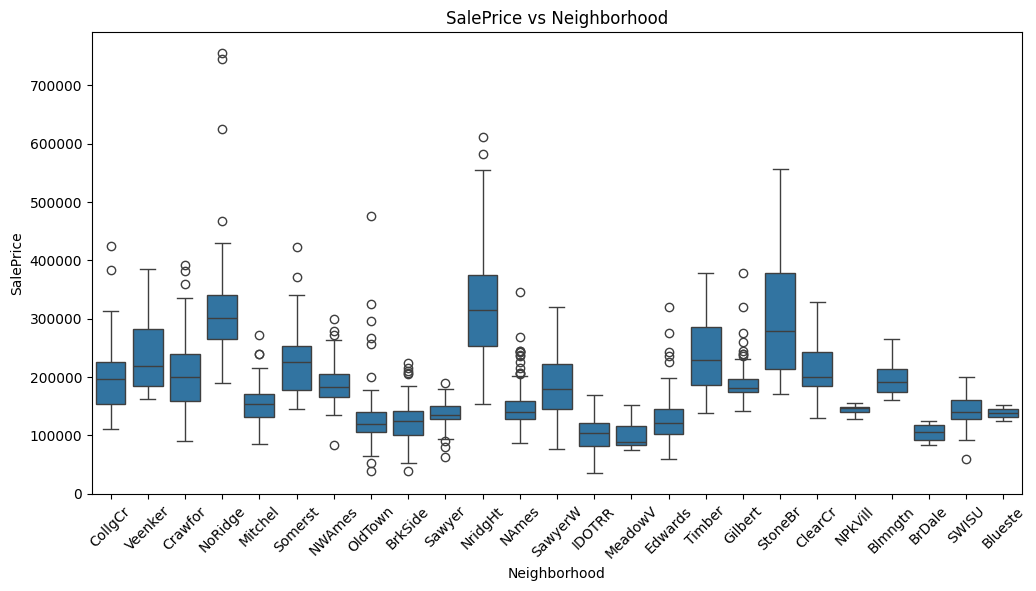

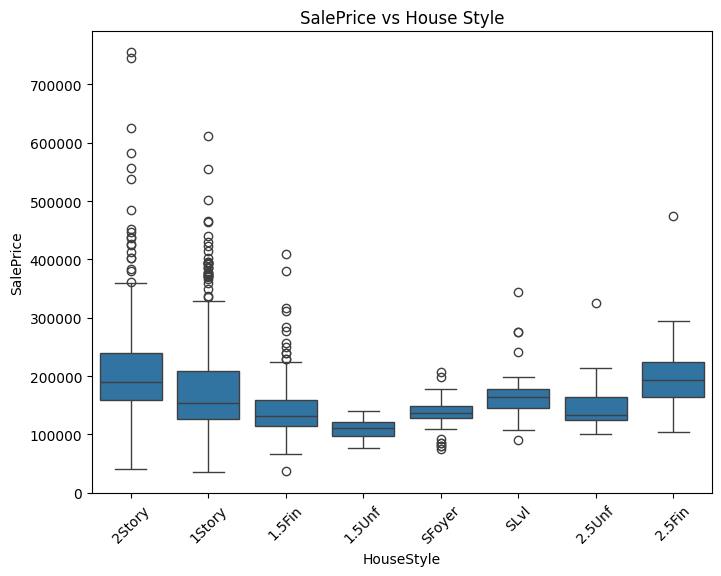

In [6]:
# Categorical relationships
# Boxplots for important categorical features

plt.figure(figsize=(12,6))
sns.boxplot(x="OverallQual", y="SalePrice", data=df)
plt.title("SalePrice vs Overall Quality")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.title("SalePrice vs Neighborhood")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x="HouseStyle", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.title("SalePrice vs House Style")
plt.show()

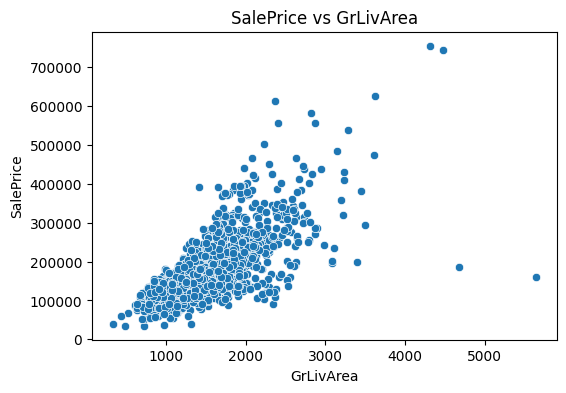

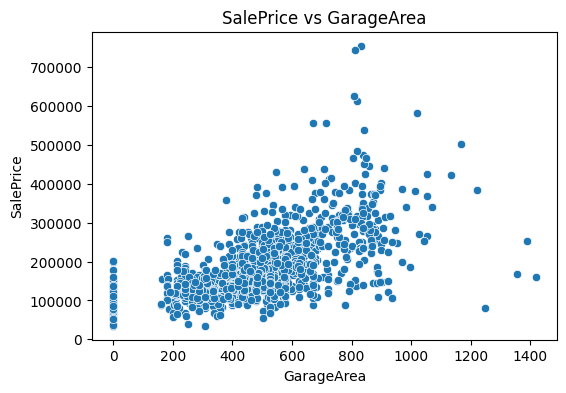

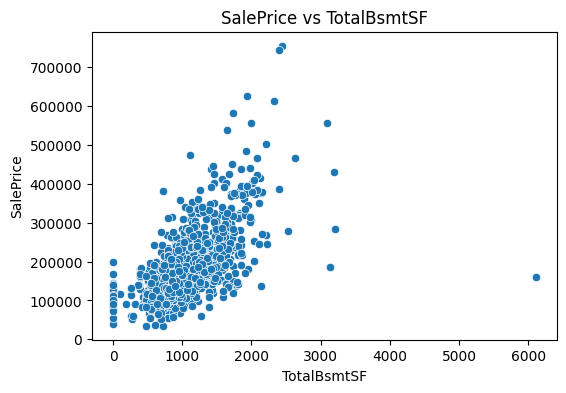

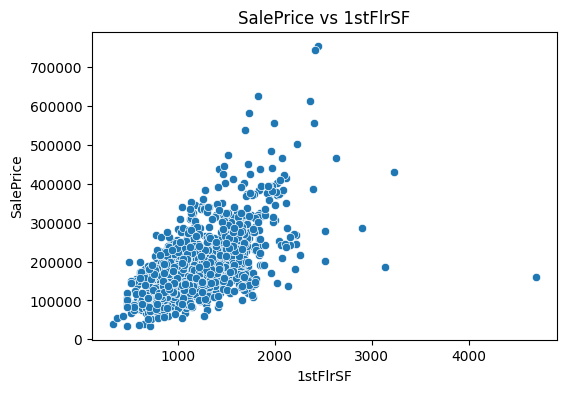

In [7]:
# Feature relationships
# Example scatterplots for top numeric features

features = ["GrLivArea", "GarageArea", "TotalBsmtSF", "1stFlrSF"]
for col in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["SalePrice"])
    plt.title(f"SalePrice vs {col}")
    plt.show()

### 🔍 EDA Summary (Ames Housing)

- **Target Distribution:** SalePrice is right-skewed; log-transform gives a near-normal distribution.  
- **Top Correlated Features:** `OverallQual`, `GrLivArea`, `GarageCars`, `GarageArea`, `TotalBsmtSF`, `1stFlrSF`, `YearBuilt`.  
- **Neighborhoods:** Some (e.g., `NridgHt`, `StoneBr`, `NoRidge`) consistently higher in price.  
- **Quality & Size Matter:** Larger living area and higher construction quality lead to higher SalePrice.  
- **Outliers:** A few extreme properties with very large living area but moderate prices—possible custom or old houses.  


In [200]:
# Step 4: Data Preprocessing & Feature Engineering

neighborhood_means = df.groupby('Neighborhood')['SalePrice'].mean()

# Create new engineered features
def create_features(df):
    df = df.copy()

    df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]
    df["TotalBath"] = df["FullBath"] + 0.5*df["HalfBath"] + df["BsmtFullBath"] + 0.5*df["BsmtHalfBath"]
    df["IsRemodeled"] = (df["YearRemodAdd"] != df["YearBuilt"]).astype(int)
    df["HasBasement"] = (df["TotalBsmtSF"] > 0).astype(int)
    df["HasGarage"] = (df["GarageArea"] > 0).astype(int)
    df["HasFireplace"] = (df["Fireplaces"] > 0).astype(int)

    df['Neighborhood'] = df['Neighborhood'].map(neighborhood_means)
    df['Neighborhood'] = df['Neighborhood'].fillna(neighborhood_means.mean())

    return df

df = create_features(df)
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MiscVal,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,IsRemodeled,HasBasement,HasGarage,HasFireplace
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000,8450,Pave,NONE,Reg,Lvl,Inside,Gtl,...,0,WD,Normal,208500,2566,3.500,0,1,1,0
2,20,RL,80.000,9600,Pave,NONE,Reg,Lvl,FR2,Gtl,...,0,WD,Normal,181500,2524,2.500,0,1,1,1
3,60,RL,68.000,11250,Pave,NONE,IR1,Lvl,Inside,Gtl,...,0,WD,Normal,223500,2706,3.500,1,1,1,1
4,70,RL,60.000,9550,Pave,NONE,IR1,Lvl,Corner,Gtl,...,0,WD,Abnorml,140000,2473,2.000,1,1,1,1
5,60,RL,84.000,14260,Pave,NONE,IR1,Lvl,FR2,Gtl,...,0,WD,Normal,250000,3343,3.500,0,1,1,1


In [201]:
# Split target (SalePrice) and features

y = np.log(df["SalePrice"])   # log-transform the target
X = df.drop("SalePrice", axis=1)

In [202]:
#3. Identify numerical vs categorical columns

num_cols = X.select_dtypes("number").columns
cat_cols = X.select_dtypes(exclude="number").columns

print(f"Numeric columns: {len(num_cols)}")
print(f"Categorical columns: {len(cat_cols)}")
print(cat_cols)

Numeric columns: 39
Categorical columns: 40
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [203]:
# 4. Preprocessing pipeline
# We’ll use StandardScaler for numeric features
# and OneHotEncoder for categorical features.

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def encode(df):
    X = df.drop("SalePrice", axis=1, errors='ignore')
    num_cols = X.select_dtypes("number").columns
    cat_cols = X.select_dtypes(exclude="number").columns
    
    ctf = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ],
        verbose_feature_names_out=True,
        remainder='passthrough'
    )

    t_df = ctf.fit_transform(X)
    cols = ctf.get_feature_names_out()
    out_df = pd.DataFrame(t_df.toarray(), columns=cols, index=df.index)

    # rename remainder__SalePrice
    # out_df = out_df.rename(columns={'remainder__SalePrice': 'SalePrice'})
    out_df['SalePrice'] = df['SalePrice']

    return out_df ,ctf

enc_df,ctf = encode(df)
enc_df.columns


Index(['num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__Neighborhood', 'num__OverallQual', 'num__OverallCond',
       'num__YearBuilt', 'num__YearRemodAdd', 'num__MasVnrArea',
       'num__BsmtFinSF1',
       ...
       'cat__SaleType_New', 'cat__SaleType_Oth', 'cat__SaleType_WD',
       'cat__SaleCondition_Abnorml', 'cat__SaleCondition_AdjLand',
       'cat__SaleCondition_Alloca', 'cat__SaleCondition_Family',
       'cat__SaleCondition_Normal', 'cat__SaleCondition_Partial', 'SalePrice'],
      dtype='object', length=276)

In [204]:
# Using Lasso Regression for feature selection
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

X = enc_df.drop("SalePrice", axis=1).values
y = np.log(enc_df["SalePrice"]).values

alpha_values = np.linspace(0.000001, 10, 1000)
params = {"alpha":alpha_values}

kf = KFold(n_splits=5, shuffle=True, random_state=28)

lasso = Lasso()

lasso_cv = GridSearchCV(lasso, param_grid=params, cv=kf, verbose=10)

lasso_cv.fit(X,y)

print(f"Best alpha: {lasso_cv.best_params_}")

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5; 1/1000] START alpha=1e-06..............................................
[CV 1/5; 1/1000] END ...............alpha=1e-06;, score=0.633 total time=   0.1s
[CV 2/5; 1/1000] START alpha=1e-06..............................................
[CV 2/5; 1/1000] END ...............alpha=1e-06;, score=0.915 total time=   0.1s
[CV 3/5; 1/1000] START alpha=1e-06..............................................
[CV 3/5; 1/1000] END ...............alpha=1e-06;, score=0.924 total time=   0.1s
[CV 4/5; 1/1000] START alpha=1e-06..............................................
[CV 4/5; 1/1000] END ...............alpha=1e-06;, score=0.827 total time=   0.1s
[CV 5/5; 1/1000] START alpha=1e-06..............................................
[CV 5/5; 1/1000] END ...............alpha=1e-06;, score=0.905 total time=   0.1s
[CV 1/5; 2/1000] START alpha=0.010011009009009008...............................
[CV 1/5; 2/1000] END alpha=0.010011009009009

In [150]:
lasso_cv.best_params_['alpha']

np.float64(0.010011009009009008)

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=28)

lasso = Lasso(alpha=0.010011009009009008)
lasso.fit(X_train,y_train)

lasso_coef = np.abs(lasso.coef_)

lasso_coef

array([0.01583051, 0.        , 0.01271571, 0.06229949, 0.09410906,
       0.03996313, 0.04931812, 0.02390378, 0.        , 0.0238132 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03995929, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00730999, 0.00783933, 0.02796358, 0.        ,
       0.0187486 , 0.02299953, 0.005653  , 0.        , 0.        ,
       0.        , 0.00967654, 0.        , 0.09107937, 0.02397414,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [206]:
columns = enc_df.drop("SalePrice", axis=1).columns
print(f"Columns Names: {columns}")

Columns Names: Index(['num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__Neighborhood', 'num__OverallQual', 'num__OverallCond',
       'num__YearBuilt', 'num__YearRemodAdd', 'num__MasVnrArea',
       'num__BsmtFinSF1',
       ...
       'cat__SaleType_ConLw', 'cat__SaleType_New', 'cat__SaleType_Oth',
       'cat__SaleType_WD', 'cat__SaleCondition_Abnorml',
       'cat__SaleCondition_AdjLand', 'cat__SaleCondition_Alloca',
       'cat__SaleCondition_Family', 'cat__SaleCondition_Normal',
       'cat__SaleCondition_Partial'],
      dtype='object', length=275)


In [207]:
features_to_remove = np.array(columns)[lasso_coef<0.0001]

features_to_remove

array(['num__LotFrontage', 'num__MasVnrArea', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__LowQualFinSF', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr',
       'num__GarageYrBlt', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__MiscVal', 'num__IsRemodeled',
       'num__HasBasement', 'num__HasGarage', 'num__HasFireplace',
       'cat__MSZoning_C (all)', 'cat__MSZoning_FV', 'cat__MSZoning_RH',
       'cat__MSZoning_RL', 'cat__MSZoning_RM', 'cat__Street_Grvl',
       'cat__Street_Pave', 'cat__Alley_Grvl', 'cat__Alley_NONE',
       'cat__Alley_Pave', 'cat__LotShape_IR1', 'cat__LotShape_IR2',
       'cat__LotShape_IR3', 'cat__LotShape_Reg', 'cat__LandContour_Bnk',
       'cat__LandContour_HLS', 'cat__LandContour_Low',
       'cat__LandContour_Lvl', 'cat__LotConfig_Corner',
       'cat__LotConfig_CulDSac', 'cat__LotConfig_FR2',
       'cat__LotConfig_FR3', 'cat__L

In [208]:
new_df = enc_df.drop(columns=features_to_remove)

new_df.columns

Index(['num__MSSubClass', 'num__LotArea', 'num__Neighborhood',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__BsmtFinSF1', 'num__GrLivArea',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__GarageArea', 'num__WoodDeckSF',
       'num__ScreenPorch', 'num__TotalSF', 'num__TotalBath', 'SalePrice'],
      dtype='object')

## Summary

In this notebook we did the following on the cleaned dataset:

1. Created new features (`TotalSF`, `TotalBath`, etc)
2. Scaled numeric features and encoded categorical features

In [218]:
def transform_features_train(df):
    df = create_features(df)
    df, ctf = encode(df)
    df = df.drop(columns=features_to_remove)
    return df, ctf

In [219]:
def transform_features_test(df, ctf):
    df = create_features(df)

    t_df = ctf.transform(df)
    cols = ctf.get_feature_names_out()
    out_df = pd.DataFrame(t_df.toarray(), columns=cols, index=df.index)

    out_df = out_df.drop(columns=features_to_remove)
    return out_df

In [220]:
train = pd.read_csv(in_file_paths['train'], index_col='Id')
test = pd.read_csv(in_file_paths['test'], index_col='Id')

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

In [221]:
train = pd.read_csv(in_file_paths['train'], index_col='Id')
test = pd.read_csv(in_file_paths['test'], index_col='Id')
train,ctf = transform_features_train(train)
test = transform_features_test(test, ctf)
train.columns

Index(['num__MSSubClass', 'num__LotArea', 'num__Neighborhood',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__BsmtFinSF1', 'num__GrLivArea',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__GarageArea', 'num__WoodDeckSF',
       'num__ScreenPorch', 'num__TotalSF', 'num__TotalBath', 'SalePrice'],
      dtype='object')

In [222]:
train.shape, test.shape

((1460, 19), (1459, 18))

In [223]:
train.to_csv(out_file_paths['train'])
test.to_csv(out_file_paths['test'])